In [29]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [76]:
train = pd.read_csv('train.csv')
print(train.shape)
train

(1095, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,189000
1091,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
1092,382,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,187750
1093,1414,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000


## 取出連續型特徵 (方便降維)

In [77]:
continual = [f for f in train.columns if train.dtypes[f] != 'object']
continual.remove('Id')
train = train[continual]
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,60.0,21930,5,5,2005,2005,0.0,0,0,...,100,40,0,0,0,0,0,7,2006,192140
1,60,68.0,10769,8,5,2007,2007,0.0,20,0,...,144,105,0,0,0,0,0,4,2009,212000
2,120,34.0,4590,8,5,2006,2006,108.0,24,0,...,156,73,0,0,0,0,0,8,2007,209500
3,50,60.0,9600,5,8,1925,1994,0.0,0,0,...,0,0,84,0,0,0,0,7,2007,125000
4,80,94.0,7819,6,5,1976,1976,0.0,422,127,...,144,0,0,0,0,0,0,3,2010,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,70,51.0,9842,5,6,1921,1998,0.0,0,0,...,183,0,301,0,0,0,0,5,2008,189000
1091,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
1092,20,60.0,7200,7,5,2006,2006,0.0,0,0,...,216,121,0,0,0,0,0,8,2006,187750
1093,20,88.0,10994,8,5,2005,2006,366.0,976,0,...,165,44,0,0,0,0,0,9,2009,257000


## 分析缺失值

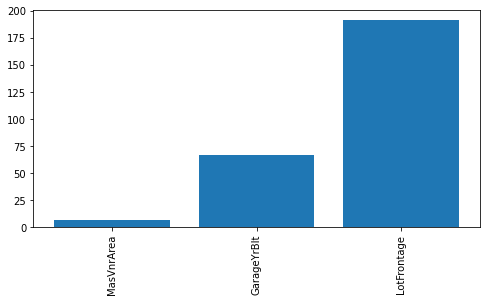

In [78]:
missing = train.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

## 去除缺失值

In [79]:
train = train.dropna()
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,60.0,21930,5,5,2005,2005,0.0,0,0,...,100,40,0,0,0,0,0,7,2006,192140
1,60,68.0,10769,8,5,2007,2007,0.0,20,0,...,144,105,0,0,0,0,0,4,2009,212000
2,120,34.0,4590,8,5,2006,2006,108.0,24,0,...,156,73,0,0,0,0,0,8,2007,209500
3,50,60.0,9600,5,8,1925,1994,0.0,0,0,...,0,0,84,0,0,0,0,7,2007,125000
4,80,94.0,7819,6,5,1976,1976,0.0,422,127,...,144,0,0,0,0,0,0,3,2010,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,70,51.0,9842,5,6,1921,1998,0.0,0,0,...,183,0,301,0,0,0,0,5,2008,189000
1091,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
1092,20,60.0,7200,7,5,2006,2006,0.0,0,0,...,216,121,0,0,0,0,0,8,2006,187750
1093,20,88.0,10994,8,5,2005,2006,366.0,976,0,...,165,44,0,0,0,0,0,9,2009,257000


## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [82]:
X=np.array(train.drop(columns=['SalePrice']))
X=(X-X.mean(axis=0))/X.std(axis=0)

Y=np.array(train['SalePrice'])
Y=pd.qcut(Y, 4, labels=False)
print(X.shape, Y.shape)

(838, 36) (838,)


## 利用 TSNE 降維

In [83]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)

## 做圖

In [84]:
df_tsne = pd.DataFrame()
df_tsne['X_tsne1'] = X_tsne[:, 0]
df_tsne['X_tsne2'] = X_tsne[:, 1]
df_tsne['label'] = Y
df_tsne.head()

,X_tsne1,X_tsne2,label
0,7.560471,23.853655,2
1,13.521441,24.494490,2
2,16.611128,1.731550,2
3,-22.297409,5.651978,0
4,-10.765700,-14.586370,0


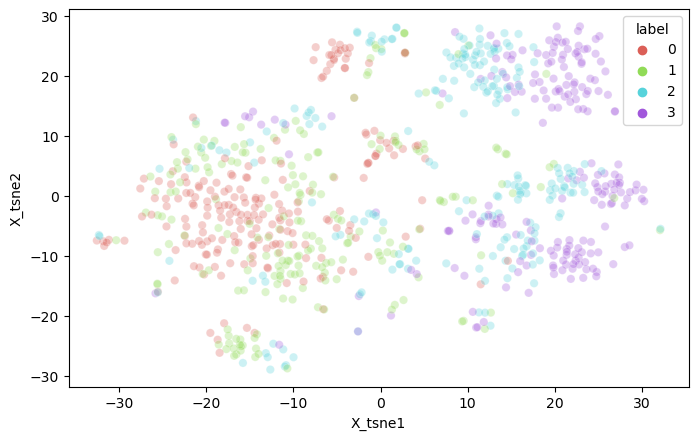

In [85]:
plt.figure(figsize = (8, 5), dpi = 100)
sns.scatterplot(
    x = 'X_tsne1', y = 'X_tsne2',
    hue = 'label', palette = sns.color_palette('hls', 4),
    data = df_tsne, legend = 'full',
    alpha = 0.3
)
plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？